In [1]:
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2
from skimage import color
from skimage import io

In [2]:
animal = 'MD175'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'C1', 'thumbnail')
file = '150.tif'
infile = os.path.join(INPUT, file)

In [3]:
img = io.imread(infile)
print('img',img.dtype, img.shape)
new_img = color.rgb2gray(img)
new_img *= 255 # or any coefficient
new_img = new_img.astype(np.uint8)
new_img[(new_img > 200)] = 0
#ids, counts = np.unique(img, return_counts=True)
#print('img',img.dtype, img.shape, ids, counts)

img uint8 (518, 605, 3)


In [4]:
lowerbound = 0
upperbound = 255
#all pixels value above lowerbound will  be set to upperbound 
_, thresh = cv2.threshold(new_img.copy(), lowerbound, upperbound, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
thresh = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
thresh_i = cv2.bitwise_not(thresh)
ids, counts = np.unique(thresh, return_counts=True)

r = cv2.bitwise_not(new_img, mask=thresh_i)
g = cv2.bitwise_not(new_img, mask=thresh_i)
b = cv2.bitwise_not(new_img, mask=thresh_i)
cleaned = np.stack([r, g, b], axis=2)

uint8 (518, 605) [  0 255] [141412 171978]
uint8 (518, 605)


In [5]:
#areaArray = []
#ids, counts = np.unique(thresh, return_counts=True)
#print('thresh',thresh.dtype, thresh.shape, ids, counts)
#contours ,hier = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#for i, c in enumerate(contours):
#    area = cv2.contourArea(c)
#    print(i,area)
#    if area > 1000:
#        areaArray.append(area)

# first sort the array by area
#sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)
#data = []
#for i in range(len(sorteddata)):
#    print(i)
#    data.append(sorteddata[i][1])

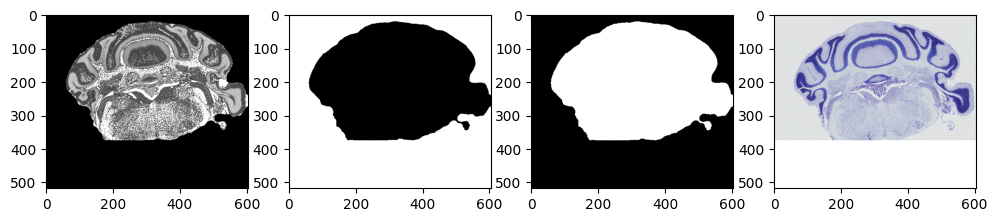

In [6]:
#drawn_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)  
#drawn_img = cv2.drawContours(drawn_img, data, -1, (255,0,0), 10)
images = [cleaned, thresh, thresh_i, img]
_, axs = plt.subplots(1, len(images), figsize=(12, 12))
axs = axs.flatten()
for image, ax in zip(images, axs):
    ax.imshow(image, cmap="gray")
plt.show()